1- Importing Necessary Libraries

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

2 - Loading and Inspecting KDD Dataset

In [20]:
file_path = "Sample_KDD(2) 2.csv" 
dataset = pd.read_csv(file_path)

print("Dataset shape:", dataset.shape)
print("First few rows of the dataset:")
print(dataset.head())

print("\nNull values in each column:")
print(dataset.isnull().sum())

print("\nDataset summary:")
print(dataset.describe())

Dataset shape: (200, 23)
First few rows of the dataset:
   duration  src_bytes  dst_bytes  count  srv_count  serror_rate  \
0         0        520          0    428        428          0.0   
1         0          0          0    131         18          0.0   
2         0          0          0     20          8          1.0   
3         0       1235        404      1          4          0.0   
4         0        224       1415      1          1          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  ...  \
0              0.0          0.0              0.0           1.00  ...   
1              0.0          1.0              1.0           0.14  ...   
2              1.0          0.0              0.0           0.40  ...   
3              0.0          0.0              0.0           1.00  ...   
4              0.0          0.0              0.0           1.00  ...   

   dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                 255        

3 - Splitting Dataset (70% Training , 30% Testing) 

In [21]:
class_column = dataset.columns[-1]

X = dataset.drop(columns=[class_column])
y = dataset[class_column]

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())

Training set class distribution:
class
anomaly    70
normal     70
Name: count, dtype: int64

Testing set class distribution:
class
normal     30
anomaly    30
Name: count, dtype: int64


4 - Apply PCA (Dimensionality Reduction)

In [22]:
# Standardize the features for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA
pca = PCA(n_components=None)  # None means we keep all components for now not delete them 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explaining variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:")
print(explained_variance)

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
print("\nCumulative explained variance:")
print(cumulative_variance)

# Determine how many components explain 95% of the variance
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"\nNumber of components explaining 95% of the variance: {n_components_95}")

Explained variance ratio for each component:
[3.07227679e-01 2.35889183e-01 9.26610429e-02 7.92440472e-02
 6.02201001e-02 5.24874015e-02 4.89606068e-02 3.30028810e-02
 2.12542580e-02 2.04050061e-02 1.56996924e-02 1.13457926e-02
 8.20582466e-03 3.45967142e-03 2.77049935e-03 2.61735075e-03
 2.25402356e-03 1.45679678e-03 4.61039340e-04 2.47621662e-04
 9.26414237e-05 3.68400189e-05]

Cumulative explained variance:
[0.30722768 0.54311686 0.63577791 0.71502195 0.77524205 0.82772945
 0.87669006 0.90969294 0.9309472  0.95135221 0.9670519  0.97839769
 0.98660352 0.99006319 0.99283369 0.99545104 0.99770506 0.99916186
 0.9996229  0.99987052 0.99996316 1.        ]

Number of components explaining 95% of the variance: 10


5 - Classification with KNN

Accuracy with 2 components: 0.9833
Accuracy with 4 components: 0.9833
Accuracy with 6 components: 0.9833
Accuracy with 8 components: 0.9833
Accuracy with 10 components: 1.0000


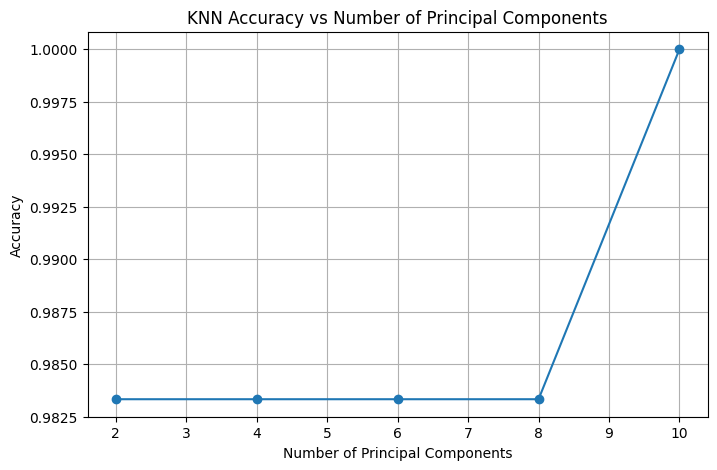

In [23]:
# KNN (k=5)
k = 5
components_range = range(2, 11, 2)  # From 2 to 10 components, step of 2
knn_accuracies = []

for n_components in components_range:
    # Reduce the dataset to n_components
    X_train_reduced = X_train_pca[:, :n_components]
    X_test_reduced = X_test_pca[:, :n_components]
    
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reduced, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test_reduced)
    
    # Measure accuracy
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print(f"Accuracy with {n_components} components: {accuracy:.4f}")

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(components_range, knn_accuracies, marker='o')
plt.title("KNN Accuracy vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

5 - Classification with SVM

Accuracy with 2 components: 0.9000
Accuracy with 4 components: 0.9333
Accuracy with 6 components: 0.9667
Accuracy with 8 components: 0.9500
Accuracy with 10 components: 0.9500


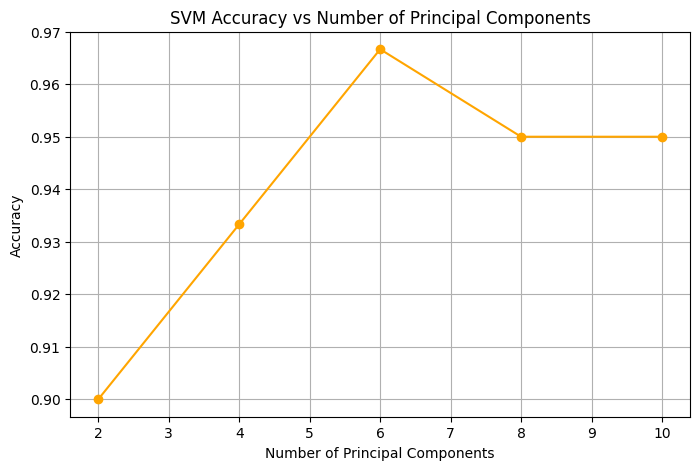

In [24]:
svm_accuracies = []

for n_components in components_range:
    # Reduce the dataset to n_components
    X_train_reduced = X_train_pca[:, :n_components]
    X_test_reduced = X_test_pca[:, :n_components]
    
    # Train SVM
    svm = SVC(kernel='linear', random_state=42)  # Using a linear kernel
    svm.fit(X_train_reduced, y_train)
    
    # Predict on test set
    y_pred = svm.predict(X_test_reduced)
    
    # Measure accuracy
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)
    print(f"Accuracy with {n_components} components: {accuracy:.4f}")

# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.plot(components_range, svm_accuracies, marker='o', color='orange')
plt.title("SVM Accuracy vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

6 - Discussion and Analysis

Results Summary:
   Components  KNN Accuracy  SVM Accuracy
0           2      0.983333      0.900000
1           4      0.983333      0.933333
2           6      0.983333      0.966667
3           8      0.983333      0.950000
4          10      1.000000      0.950000

Optimal number of components:
KNN: 10 (Accuracy: 1.0000)
SVM: 6 (Accuracy: 0.9667)


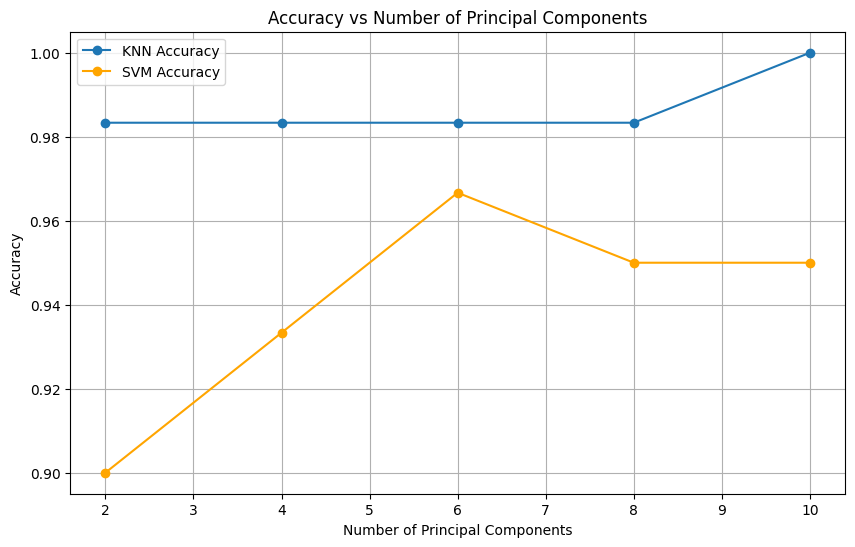

In [25]:
# Summarize results
results_summary = pd.DataFrame({
    "Components": components_range,
    "KNN Accuracy": knn_accuracies,
    "SVM Accuracy": svm_accuracies
})
print("Results Summary:")
print(results_summary)

# Find the optimal number of components for each model
optimal_knn_components = components_range[np.argmax(knn_accuracies)]
optimal_svm_components = components_range[np.argmax(svm_accuracies)]

print("\nOptimal number of components:")
print(f"KNN: {optimal_knn_components} (Accuracy: {max(knn_accuracies):.4f})")
print(f"SVM: {optimal_svm_components} (Accuracy: {max(svm_accuracies):.4f})")

# Plot both KNN and SVM on the same chart
plt.figure(figsize=(10, 6))
plt.plot(components_range, knn_accuracies, marker='o', label='KNN Accuracy')
plt.plot(components_range, svm_accuracies, marker='o', color='orange', label='SVM Accuracy')
plt.title("Accuracy vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

exploring and applying dimensionality reduction and machine learning classification techniques to analyze and classify a dataset.

Dimensionality Reduction (PCA):

High-dimensional data can often contain redundant or less significant features, which may increase computational complexity and reduce model performance.
Principal Component Analysis (PCA) is used to project the data into a lower-dimensional space, where each principal component represents a direction of maximum variance in the data.
This simplifies the dataset while retaining the most significant information, allowing for faster computations and potentially better model performance.
Classification with KNN and SVM:

two machine learning classifiers:
K-Nearest Neighbors (KNN): A simple instance-based learning algorithm that classifies points based on the majority class of their nearest neighbors.
Support Vector Machine (SVM): A more sophisticated algorithm that finds an optimal hyperplane to separate data points belonging to different classes.
Both classifiers are trained on reduced datasets (with varying numbers of principal components) to observe how dimensionality reduction impacts classification accuracy.
